In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_orig = pd.read_csv('data.csv', usecols=['datetime', 'machine_status', 'sensor_00', 'sensor_10', 'sensor_20', 'sensor_30', 'sensor_40', 'sensor_50'])
df_orig['datetime'] = pd.to_datetime(df_orig['datetime'])

In [5]:
cond_1 = df_orig['datetime'] >= '2018-04-12 00:00:00'
cond_2 = df_orig['datetime'] <= '2018-04-19 00:00:00'
df_orig = df_orig[cond_1 & cond_2]

In [6]:
df_orig

,sensor_00,sensor_10,sensor_20,sensor_30,sensor_40,sensor_50,machine_status,datetime
0,2.456539,34.596150,373.3553,719.4445,69.010410,238.715300,NORMAL,2018-04-12 00:00:00
1,2.456539,34.596150,373.3553,719.4445,69.010410,238.715300,NORMAL,2018-04-12 00:01:00
2,2.446702,34.899720,373.5880,709.2593,70.572910,239.872700,NORMAL,2018-04-12 00:02:00
3,2.456539,33.968870,374.9091,706.0185,71.614580,241.319400,NORMAL,2018-04-12 00:03:00
4,2.451620,35.097490,374.9961,689.3519,71.354160,241.608800,NORMAL,2018-04-12 00:04:00
...,...,...,...,...,...,...,...,...
10075,2.372221,0.885417,389.6701,643.9814,29.947916,33.564816,RECOVERING,2018-04-18 23:56:00
10076,2.372221,0.889061,391.0505,651.3889,29.947916,33.564816,RECOVERING,2018-04-18 23:57:00
10077,2.372221,0.885417,389.8206,675.9259,29.947916,33.564816,RECOVERING,2018-04-18 23:58:00
10078,2.372221,0.885417,389.9706,666.6666,29.947916,33.564816,RECOVERING,2018-04-18 23:59:00


In [8]:
df_orig = pd.read_csv('data.csv')
print(type(df_orig['sensor_00'].iloc[0]), type(df_orig['datetime'].iloc[0]))
df_orig['datetime'] = pd.to_datetime(df_orig['datetime'])
print(type(df_orig['sensor_00'].iloc[0]), type(df_orig['datetime'].iloc[0]))

<class 'numpy.float64'> <class 'str'>
<class 'numpy.float64'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
df_orig

,sensor_00,sensor_10,sensor_20,sensor_30,sensor_40,sensor_50,machine_status,datetime
0,2.456539,34.596150,373.3553,719.4445,69.010410,238.715300,NORMAL,2018-04-12 00:00:00
1,2.456539,34.596150,373.3553,719.4445,69.010410,238.715300,NORMAL,2018-04-12 00:01:00
2,2.446702,34.899720,373.5880,709.2593,70.572910,239.872700,NORMAL,2018-04-12 00:02:00
3,2.456539,33.968870,374.9091,706.0185,71.614580,241.319400,NORMAL,2018-04-12 00:03:00
4,2.451620,35.097490,374.9961,689.3519,71.354160,241.608800,NORMAL,2018-04-12 00:04:00
...,...,...,...,...,...,...,...,...
10075,2.372221,0.885417,389.6701,643.9814,29.947916,33.564816,RECOVERING,2018-04-18 23:56:00
10076,2.372221,0.889061,391.0505,651.3889,29.947916,33.564816,RECOVERING,2018-04-18 23:57:00
10077,2.372221,0.885417,389.8206,675.9259,29.947916,33.564816,RECOVERING,2018-04-18 23:58:00
10078,2.372221,0.885417,389.9706,666.6666,29.947916,33.564816,RECOVERING,2018-04-18 23:59:00


In [12]:
def drop_duplicates(df, subset):
    df = df.drop_duplicates((subset))
    return df

In [15]:
def fill_missing_date(df, column_datetime):
    print(f'Orig shape: {df.shape}')

    data_s = df.drop([column_datetime], axis=1)
    datetime_s = df[column_datetime].astype(str)

    start_date = min(df[column_datetime])
    end_date = max(df[column_datetime])
    date_s = pd.date_range(start_date, end_date, freq="min").strftime('%Y-%m-%d %H:%M:%S')

    data_processed_s = []
    for date_val in date_s:
        pos = np.where(date_val == datetime_s)[0]
        assert len(pos) in [0, 1]
        if len(pos) == 0:
            data = [date_val] + [0] * data_s.shape[1]
        elif len(pos) == 1:
            data = [date_val] + data_s.iloc[pos].values.tolist()[0]
        data_processed_s.append(data)

    df_processed = pd.DataFrame(data_processed_s, columns=[column_datetime] + data_s.columns.values.tolist())
    df_processed[column_datetime] = pd.to_datetime(df_processed[column_datetime])
    print(f'Output shape: {df_processed.shape}')

    return df_processed
    
    

In [16]:
df_processed = drop_duplicates(df_orig, subset=['datetime'])
df = fill_missing_date(df_processed, column_datetime='datetime')



Orig shape: (10080, 8)
Output shape: (10081, 8)


In [18]:
df_data = df.drop(columns=['machine_status'], axis=1)
df_labels = df[['datetime', 'machine_status']].copy()
df_labels['machine_status'][df_labels['machine_status'] != 'BROKEN'] = 0
df_labels['machine_status'][df_labels['machine_status'] == 'BROKEN'] = 1

In [19]:
df_data

,datetime,sensor_00,sensor_10,sensor_20,sensor_30,sensor_40,sensor_50
0,2018-04-12 00:00:00,2.456539,34.596150,373.3553,719.4445,69.010410,238.715300
1,2018-04-12 00:01:00,2.456539,34.596150,373.3553,719.4445,69.010410,238.715300
2,2018-04-12 00:02:00,2.446702,34.899720,373.5880,709.2593,70.572910,239.872700
3,2018-04-12 00:03:00,2.456539,33.968870,374.9091,706.0185,71.614580,241.319400
4,2018-04-12 00:04:00,2.451620,35.097490,374.9961,689.3519,71.354160,241.608800
...,...,...,...,...,...,...,...
10076,2018-04-18 23:56:00,2.372221,0.885417,389.6701,643.9814,29.947916,33.564816
10077,2018-04-18 23:57:00,2.372221,0.889061,391.0505,651.3889,29.947916,33.564816
10078,2018-04-18 23:58:00,2.372221,0.885417,389.8206,675.9259,29.947916,33.564816
10079,2018-04-18 23:59:00,2.372221,0.885417,389.9706,666.6666,29.947916,33.564816


In [24]:
df_labels[df_labels['machine_status'] == 1]

,datetime,machine_status
1315,2018-04-12 21:55:00,1
8670,2018-04-18 00:30:00,1


In [25]:
df_data_hour = df_data.groupby(pd.Grouper(key ='datetime', axis=0, freq='H')).mean()
df_labels_hour = df_labels.groupby(pd.Grouper(key='datetime', axis=0, freq='H')).sum()


In [26]:
df_data_hour

,sensor_00,sensor_10,sensor_20,sensor_30,sensor_40,sensor_50
datetime,,,,,,
2018-04-12 00:00:00,2.454064,36.762327,374.789923,692.422833,62.816837,227.936923
2018-04-12 01:00:00,2.453932,38.714658,374.677973,690.432095,56.558157,198.572528
2018-04-12 02:00:00,2.454014,38.591620,374.586542,690.748440,58.116316,188.980518
2018-04-12 03:00:00,2.454031,38.173078,374.689460,688.850302,94.179685,240.750390
2018-04-12 04:00:00,2.454195,40.511814,374.527958,690.246900,65.963538,263.951582
...,...,...,...,...,...,...
2018-04-18 20:00:00,2.372221,0.782407,390.235377,660.331780,31.280381,36.603008
2018-04-18 21:00:00,2.372221,0.862165,390.287615,662.345667,30.720485,35.884453
2018-04-18 22:00:00,2.372221,0.839191,390.336957,657.137337,30.251735,34.968171


In [27]:
df_labels_hour

,machine_status
datetime,
2018-04-12 00:00:00,0
2018-04-12 01:00:00,0
2018-04-12 02:00:00,0
2018-04-12 03:00:00,0
2018-04-12 04:00:00,0
...,...
2018-04-18 20:00:00,0
2018-04-18 21:00:00,0
2018-04-18 22:00:00,0


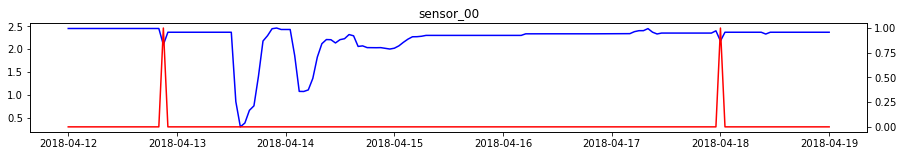

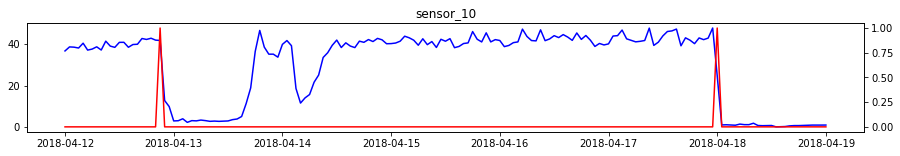

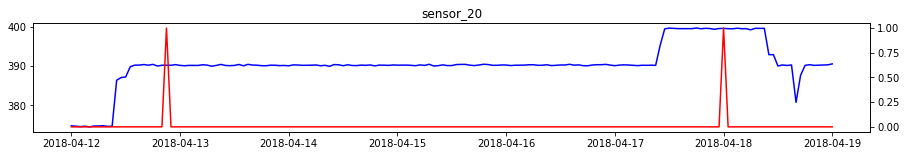

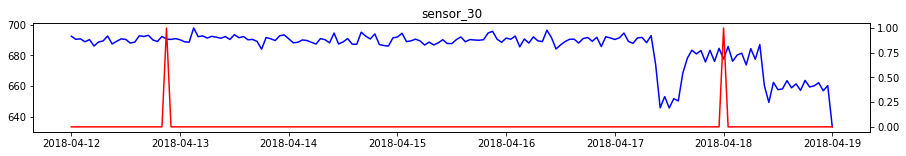

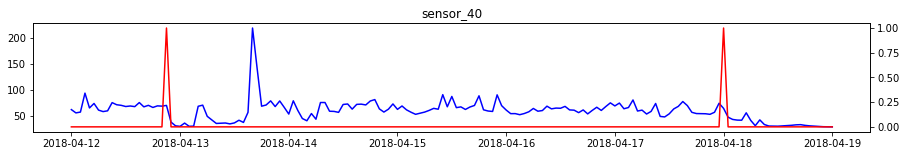

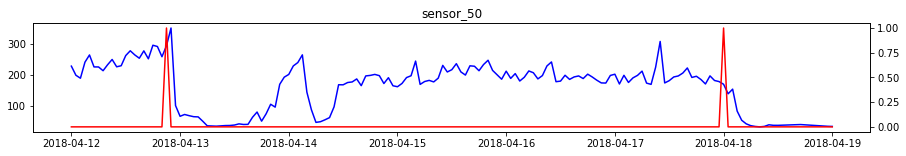

In [29]:
for name in df.columns:
    if name not in ['datetime', 'machine_status']:
        fig, axs = plt.subplots(1, 1, figsize=(15, 2))
        axs.plot(df_data_hour[name], color='blue')
        axs_twinx = axs.twinx()
        axs_twinx.plot(df_labels_hour['machine_status'], color='red')
        axs.set_title(name)
        plt.show()

In [30]:
df_data_hour = df_data.groupby(pd.Grouper(key='datetime', axis=0, freq='H')).mean()
df_labels_hour = df_labels.groupby(pd.Grouper(key='datetime', axis=0, freq='H')).sum()

df_rollmean = df_data_hour.resample(rule='D').mean()
df_rollstd = df_data_hour.resample(rule='D').std()

In [31]:
df_rollmean

,sensor_00,sensor_10,sensor_20,sensor_30,sensor_40,sensor_50
datetime,,,,,,
2018-04-12,2.432455,37.391990,383.362855,690.213468,65.951241,245.697497
2018-04-13,1.960772,12.774014,390.246442,691.174114,61.757810,66.242130
2018-04-14,1.968089,34.433977,390.256516,689.644727,64.992763,159.745530
2018-04-15,2.269154,41.525965,390.304523,690.042103,67.778860,204.649524
2018-04-16,2.330922,42.429501,390.311676,689.941152,62.118052,195.443513
2018-04-17,2.362697,43.215855,395.547469,677.234750,63.010703,195.459185
2018-04-18,2.362605,1.761954,393.891639,667.453690,37.407044,54.199822
2018-04-19,2.372221,0.885417,390.607500,633.796300,29.947916,33.564816


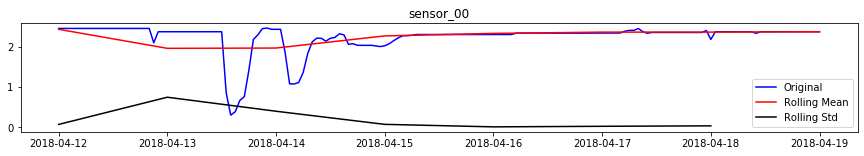

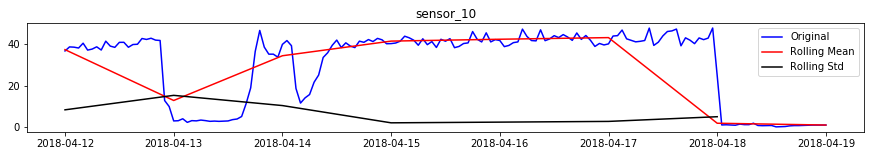

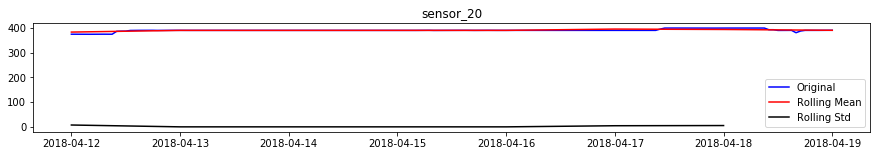

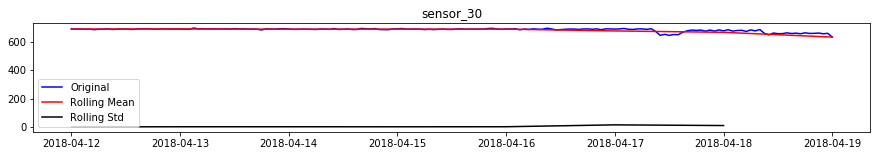

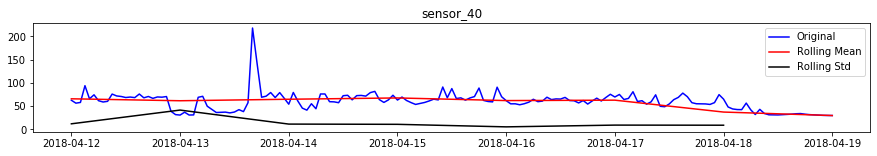

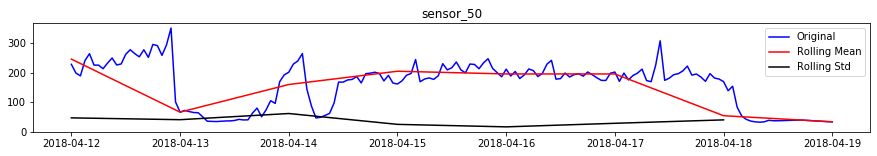

In [32]:
for name in df.columns:
    if name not in ['datetime', 'machine_status']:
        fig, axs = plt.subplots(1, 1, figsize=(15, 2))
        axs.plot(df_data_hour[name], color='blue', label='Original')
        axs.plot(df_rollmean[name], color='red', label='Rolling Mean')
        plt.plot(df_rollstd[name], color='black', label='Rolling Std')
        axs.set_title(name)
        plt.legend()
        plt.show

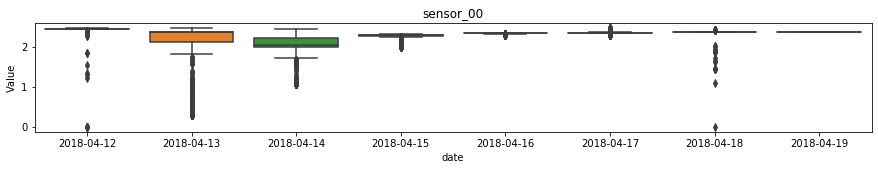

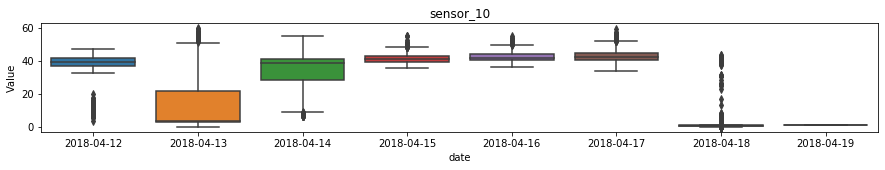

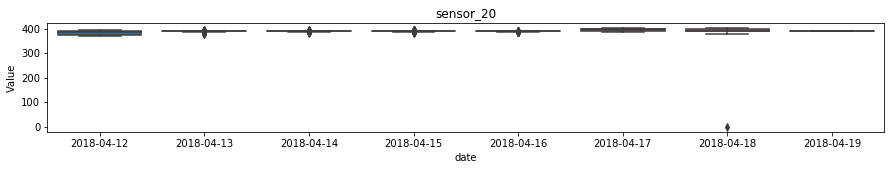

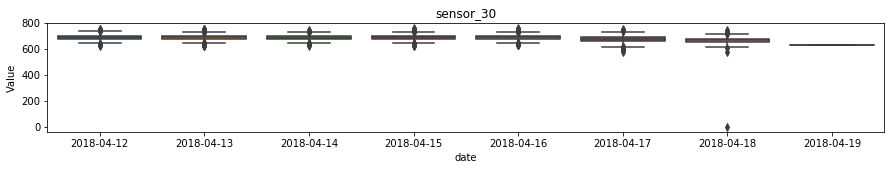

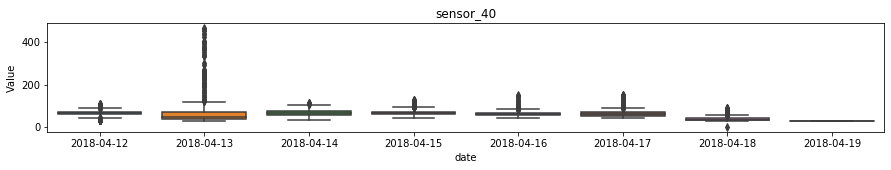

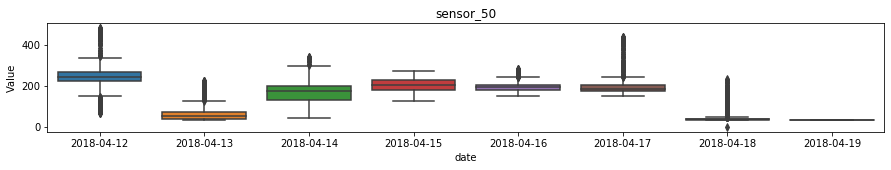

In [33]:
df_boxplot = df_data.copy()
df_boxplot['date'] = df_boxplot['datetime'].dt.strftime('%Y-%m-%d')
for name in df_boxplot.columns:
    if name not in ['datetime', 'date']:
        fig, axs = plt.subplots(1, 1, figsize=(15, 2))
        sns.boxplot(y=name, x='date', data=df_boxplot)
        axs.set_ylabel('Value')
        axs.set_title(name)
        plt.show()

In [38]:
import matplotlib.dates as dates
import scipy.stats as stats

def fft(data, nwindow=64, freq = 32):
    ffts = []
    for i in range(0, len(data)-nwindow, nwindow//2):
        sliced = data[i:i+nwindow]
        fft = np.abs(np.fft.rfft(sliced*np.hamming(nwindow))[:freq])
        ffts.append(fft.tolist())
    ffts = np.array(ffts)
    return ffts

def data_plot(date_time, data, labels, ax):
    ax.plot(date_time, data)
    ax.set_xlim(dates.date2num(np.min(date_time)), dates.date2num(np.max(date_time)))
    axs_twinx = ax.twinx()
    axs_twinx.plot(date_time, labels, color='red')
    ax.set_ylabel('Label')

def fft_plot(ffts, ax):
    ax.imshow(np.flipud(np.rot90(ffts)), aspect='auto', cmap=matplotlib.cm.bwr, 
               norm=stats.LogNorm(vmin=np.min(ffts), vmax=np.max(ffts)))
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Freq')

NameError: name 'LogNorm' is not defined

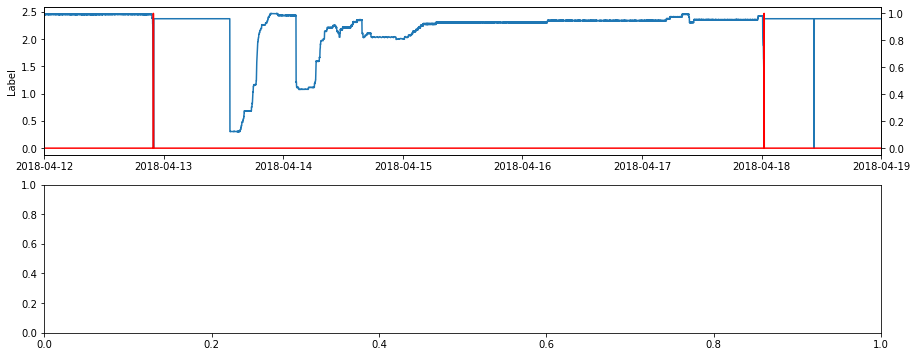

In [40]:
import matplotlib.dates as dates

df_fourier = df_data.copy()
for name in df_boxplot.columns:
    if name not in ['datetime', 'date']:
        fig, axs = plt.subplots(2, 1, figsize=(15, 6))
        data = df_fourier[name].to_numpy()
        ffts = fft(data, nwindow=64, freq = 32)
        data_plot(df_fourier['datetime'], data, df_labels['machine_status'], axs[0])
        fft_plot(ffts, axs[1])
        axs[0].set_title(name)
        plt.show()